# Chromagram Feature Detection 

<br>

As is implemented `sonify.tools.chromagram.get_chromagram_features`

In [1]:
from sonify.tools import chromagram
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters as skf
from skimage import exposure as ske
from skimage import morphology as skm

%load_ext autoreload
%autoreload 2

In [19]:
case1 = 'c0029'
case2 = 'c0004'

chromagram_filtered1   = np.load(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/chromagrams/{case1}/sac/filt_chroma.npy')
chromagram_unfiltered1 = np.load(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/chromagrams/{case1}/sac/unfilt_chroma.npy')

chromagram_filtered2   = np.load(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/chromagrams/{case2}/sac/filt_chroma.npy')
chromagram_unfiltered2 = np.load(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/chromagrams/{case2}/sac/unfilt_chroma.npy')


Text(0.5, 1.0, 'Filtered Chromagram')

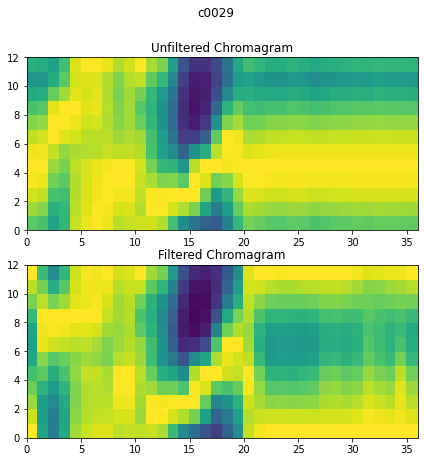

In [3]:
fig,ax = plt.subplots(2,1,figsize=(7,7))

fig.suptitle(case1)

ax[0].pcolormesh(chromagram_unfiltered1,vmin=0,vmax=1)
ax[0].set_title('Unfiltered Chromagram')

ax[1].pcolormesh(chromagram_filtered1,vmin=0,vmax=1)
ax[1].set_title('Filtered Chromagram')

Text(0.5, 1.0, 'Filtered Chromagram')

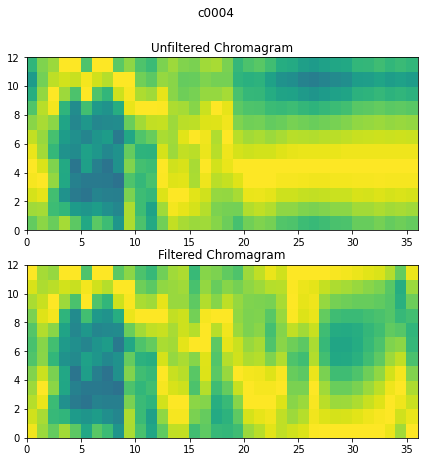

In [4]:
fig,ax = plt.subplots(2,1,figsize=(7,7))

fig.suptitle(case2)

ax[0].pcolormesh(chromagram_unfiltered2,vmin=0,vmax=1)
ax[0].set_title('Unfiltered Chromagram')

ax[1].pcolormesh(chromagram_filtered2,vmin=0,vmax=1)
ax[1].set_title('Filtered Chromagram')

In [5]:
def plot_both(chroma1,chroma2):
    fig,ax = plt.subplots(2,1,figsize=(7,7))
    ax[0].pcolormesh(chroma1)
    ax[1].pcolormesh(chroma2)

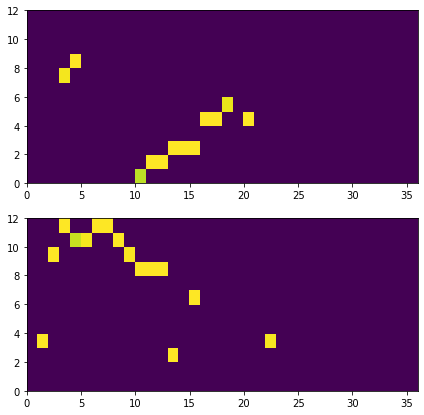

In [6]:
features1 = chromagram.get_chromagram_features(chromagram_filtered1, chromagram_unfiltered1)
features2 = chromagram.get_chromagram_features(chromagram_filtered2, chromagram_unfiltered2)
plot_both(features1,features2)

In [7]:
chromagram1=chromagram_filtered1.copy()
chromagram2=chromagram_filtered2.copy()

In [8]:
def sobel_magnitude(chromagram):
    sobel_x = skf.sobel(chromagram,axis=0)
    sobel_y = skf.sobel(chromagram,axis=1)
    sobel_mag = np.hypot(sobel_x,sobel_y)
    return sobel_mag

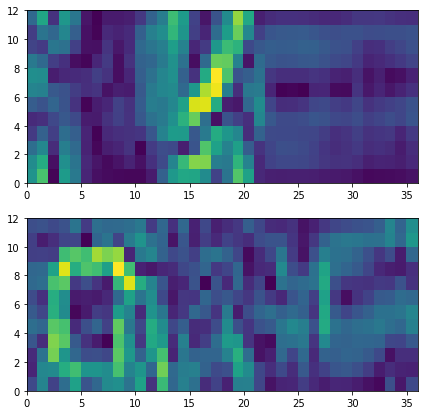

In [9]:
sobel_mag1 = sobel_magnitude(chromagram1)
sobel_mag2 = sobel_magnitude(chromagram2)

plot_both(sobel_mag1,sobel_mag2)

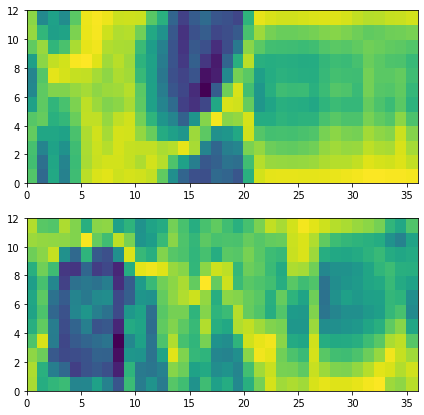

In [10]:
diff1 = chromagram1 - sobel_mag1
diff2 = chromagram2 - sobel_mag2
plot_both(diff1,diff2)

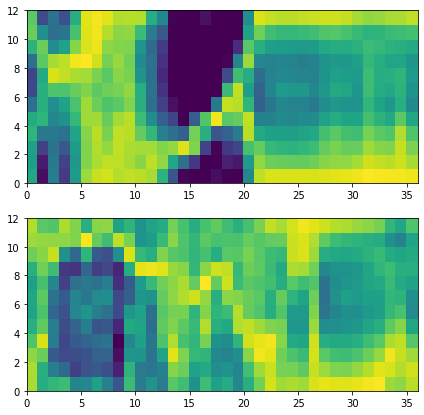

In [11]:
floor_diff1 = np.where(diff1<=0,0,diff1)
floor_diff2 = np.where(diff2<=0,0,diff2)

plot_both(floor_diff1,floor_diff2)

In [12]:
def max_min_diff(col):
    return col.max()-col.min()

max_min_diff1= np.apply_along_axis(max_min_diff,0,floor_diff1)
max_min_diff2= np.apply_along_axis(max_min_diff,0,floor_diff2)

[(0.0, 1.0), (0.0, 1.0)]

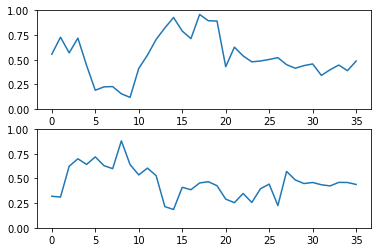

In [13]:
fig,ax  = plt.subplots(2,1)
ax[0].plot(max_min_diff1)
ax[1].plot(max_min_diff2)

[a.set_ylim(0,1) for a in ax]

In [14]:
def max_min_threshold(chroma,max_min_diff,thresh=0.5,inverse=False):
    if inverse:
        masking_col = np.where(max_min_diff>thresh,0,1)
    else:
        masking_col = np.where(max_min_diff>thresh,1,0)
    return chroma*masking_col

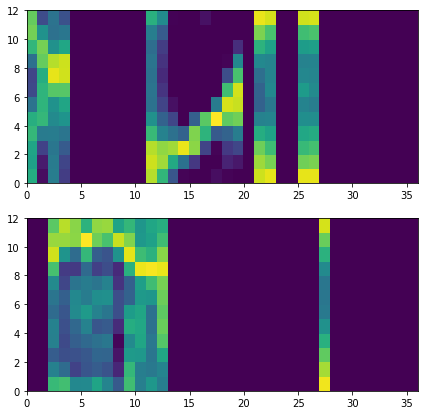

In [15]:
max_min_masked1 =  max_min_threshold(floor_diff1,max_min_diff1)
max_min_masked2 =  max_min_threshold(floor_diff2,max_min_diff2)

plot_both(max_min_masked1,max_min_masked2)

[(0.0, 12.0), (0.0, 12.0)]

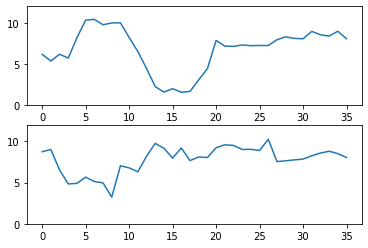

In [16]:
fig,ax  = plt.subplots(2,1)
ax[0].plot(np.sum(floor_diff1,axis=0))
ax[1].plot(np.sum(floor_diff2,axis=0))

[a.set_ylim(0,12) for a in ax]

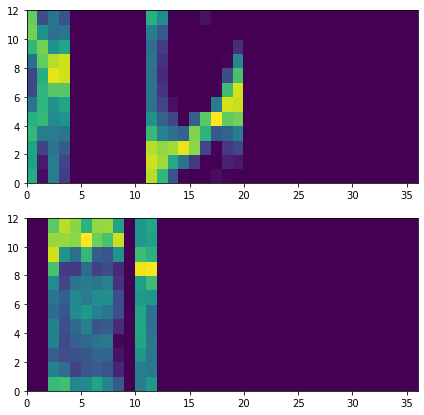

In [18]:
max_min_masked1 =  max_min_threshold(floor_diff1,np.sum(floor_diff1,axis=0),thresh=7,inverse=True)
max_min_masked2 =  max_min_threshold(floor_diff2,np.sum(floor_diff2,axis=0),thresh=7,inverse=True)


plot_both(max_min_masked1,max_min_masked2)